# Multiprocessing

El paquete `multiproccessing` permite generar procesos. La ejecució *concurrente* la lleva acabo el intérprete de Python (escrito en C `CPython`). El paquete ofrece concurrencia tanto local como remota, por medio del Interpretre de bloqueo global (GIL. Debido a esto, el módulo `multiprocessing` permite al programador aprovechar al máximo múltiples procesadores en una máquina determinada. La ejecución de multiples procesos creados con `multiprocessing` es posible tanto en Unix como en Windows.

## GIL: Global Interpreter Lock

Es el mecanismo utilizado por el intérprete CPython para garantizar que solo un subproceso ejecute el código de bytes (*bytecode*) de Python a la vez. Esto simplifica la implementación de CPython al hacer que el modelo de objetos esté implícitamente seguro contra el acceso concurrente.
El GIL funciona como un mecanismo de sincronización en la ejecución de procesos (e hilos) tal que únicamente un proceso (o hilo) puede ejecutarse a la vez, aún en un procesador multi-core.

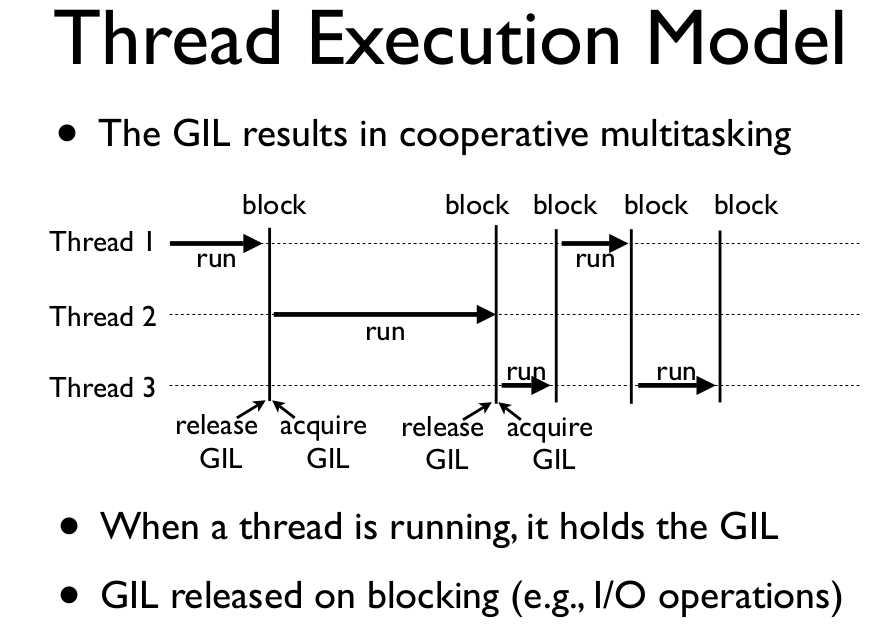

In [24]:
from IPython.display import Image
Image("gil_beazley.png", width=550, height=500)

In [1]:
import multiprocessing

Con el método `cpu_count()` se muestra el número de procesadores del sistema que se está utilizando.

In [25]:
multiprocessing.cpu_count()

8

El identificador del proceso actual se accede por medio de `current_process` 

print(multiprocessing.current_process().pid)

Con la función `Process()` se crea un proceso hijo que ejecuta la tarea especificada en el valor del argumento `target`.

In [6]:
import time

In [11]:
def childTask():
    print("Child Process With PID: {}".format(multiprocessing.current_process().pid))
    time.sleep(3)
    print("Child process terminating")

def main():
    print("Main process PID: {}".format(multiprocessing.current_process().pid))
    myProcess = multiprocessing.Process(target=childTask)
    myProcess.start()
    myProcess.join()

# Se acostumbra usar la variable __name__
# para hacer la ejecución desde el progragrama
# principal. En los ejemplos con notebooks la omitiremos 
if __name__ == '__main__':
    main()

Main process PID: 8393
Child Process With PID: 9049
Child process terminating


Es posible asignar un nombre a un proceso hijo que ha sido creado, por medio del argumento `name` se asigna el nombre del proceso hijo.

In [26]:
def myProcess():
    print("{} Just performed X".format(multiprocessing.current_process().name))

def main():
    childProcess = multiprocessing.Process(target=myProcess, name='My-Awesome-Process')
    childProcess.start()
    childProcess.join()

main()

My-Awesome-Process Just performed X


Un proceso que está en ejecución puede ser cancelado o interrumpido por medido de la función `terminate()`

In [29]:
def myProcess():
    current_process = multiprocessing.current_process()
    print("Child Process PID: {}".format(current_process.pid))
    time.sleep(20)
    current_process = multiprocessing.current_process()
    print("Main process PID: {}".format(current_process.pid))

myProcess = multiprocessing.Process(target=myProcess)
myProcess.start()
#myProcess.join()

print("My Process has terminated, terminating main thread")
print("Terminating Child Process")
myProcess.terminate()
print("Child Process Successfully terminated")

My Process has terminated, terminating main thread
Terminating Child Process
Child Process Successfully terminated


En el siguiente ejemplo se muestra como crear un proceso por medio de la definición de la clase `MyProcess` que hereda de la clase base `multiprocessing.Process`. La clase creada incluye un constructor y el método `run`. 

In [3]:
class MyProcess(multiprocessing.Process):
    def __init__(self):
        super(MyProcess, self).__init__()

    def run(self):
        print("Child Process PID: {}".format(multiprocessing.current_process().pid))

def main():
    print("Main Process PID: {}".format(multiprocessing.current_process().pid))
    myProcess = MyProcess()
    myProcess.start()
    myProcess.join()
        
main()

Main Process PID: 12676
Child Process PID: 12702
